In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import proplot
import numpy as np

In [2]:
def open_seasonal_data_rhires_region(season, region):
    try:
        data_var = xr.open_dataset(fr'./data/seasonal/RhiresM_{region}_{season}_seasonal_series_1961_2023.nc')['RhiresM'] # open the saved data
    except:
        data_var = xr.open_dataset(fr'./data/seasonal/Rhires_{region}_{season}_series_1971_2023.nc')[var] # open the saved data

    return data_var

In [3]:
def resample_monthly_to_seasonal(data_var, resample_by='mean'):
    if resample_by=='mean':
        data_resampled = data_var.resample(time='QS-DEC').mean().mean(dim=['x', 'y']) # resample seasonally and then get the mean across E-N
    elif resample_by=='sum':
        data_resampled = data_var.resample(time='QS-DEC').sum().mean(dim=['x', 'y']) # resample seasonally and then get the mean across E-N
    return data_resampled

In [4]:
def get_seasonal_time_series(data_resampled, season=12):
    """
    data_resampled: data that is seasonally resampled
    season: either 12,3,6,9 corresponding to DJF,MAM,JJA,SON
    """
    data_resampled_season = data_resampled.time.dt.month.isin(season)
    return data_resampled[data_resampled_season]

In [5]:
"""available_vars = ['TabsM', 'RhiresM', 'TmaxM', 'TminM']
available_vars_map = {'TabsM': 'Temperature', 'RhiresM': 'Precipitation', 
                      'TmaxM': 'Max. Temperature', 'TminM': 'Min. Temperature'}"""

season_val_map = {12:'DJF',
                  3: 'MAM',
                  6: 'JJA',
                  9: 'SON'}

"""var_color_map = {'TabsM': '#9370DB',
               'RhiresM': '#98FB98',
               'TmaxM': '#FF7F50',
               'TminM': '#87CEEB'}"""

color_map = ['#00ced1', '#ffa500', '#00ff00', '#0000ff', '#ff1493']
regions = ['Alps', 'Jura', 'Plateau','Pre-Alps', 'Southern Alps']

C:\Users\swann\AppData\Local\Temp\ipykernel_1356\4002517149.py:52: ProplotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  axs.set_xlabel('Years', fontsize=12, fontweight='bold')
C:\Users\swann\AppData\Local\Temp\ipykernel_1356\4002517149.py:53: ProplotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  axs.set_ylabel('Precipitation', fontsize=12, fontweight='bold')
C:\Users\swann\AppData\Local\Temp\ipykernel_1356\4002517149.py:54: ProplotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  axs.set_xlim(1960, 2023)
C:\Users\swann\AppData\Local\Temp\ipykernel_1356\4002517149.py:55: ProplotWarning: Calling arbitrary axes

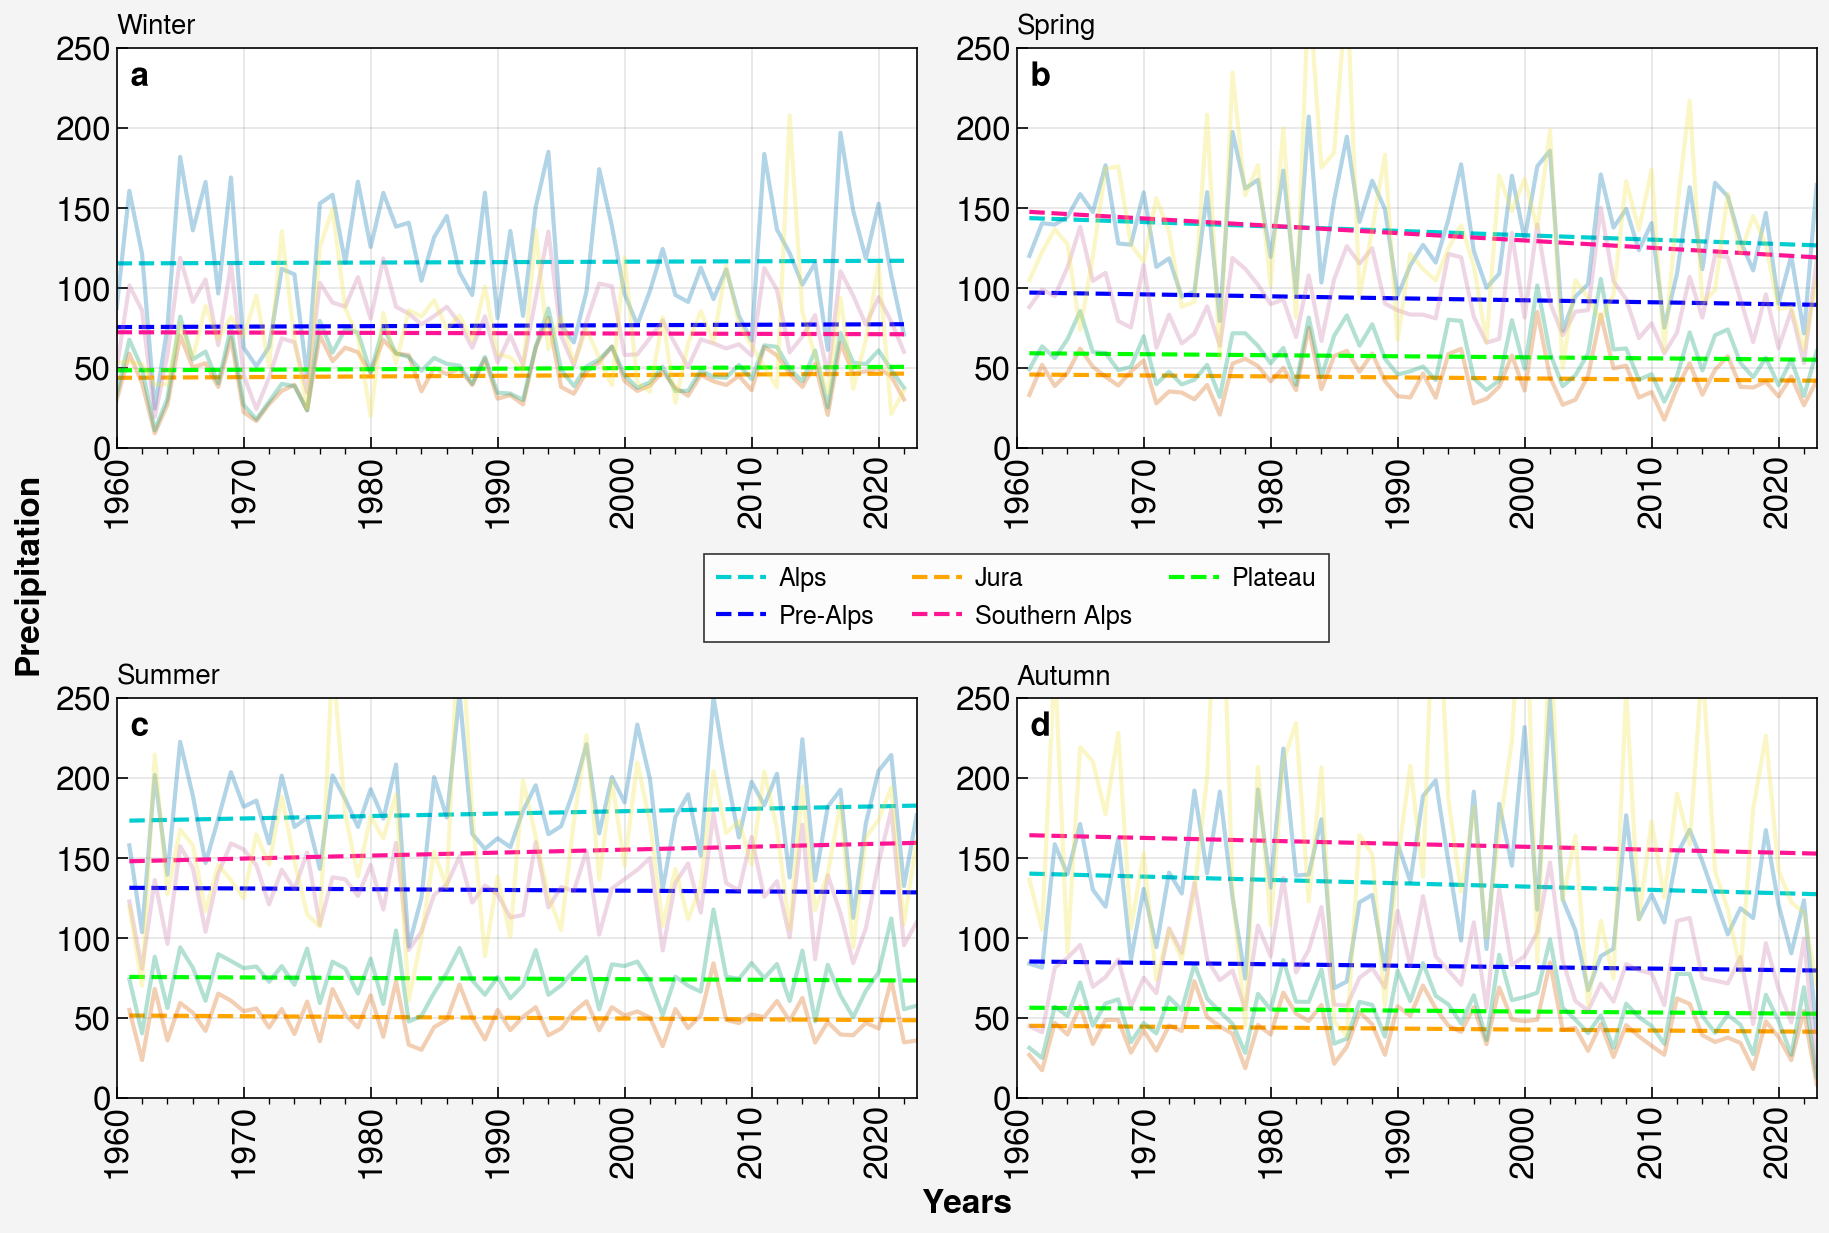

In [9]:
fig_array = [[1,2],
             [3,4]]

fig, axs = proplot.subplots(fig_array, 
                            axwidth=4,
                            axheight=2,
                            hratios=tuple(np.ones(len(fig_array), dtype=int)),
                            includepanels=True,
                            hspace=10,
                            wspace=4,
                            sharey=1,
                            sharex=1)

turn = 0
season_grid = [[12,3],[6,9]]
var_season_time_series = {}
for turn in range(2):
    for season_val, i in zip(season_grid[turn], fig_array[turn]):
        for idx, region in enumerate(regions):
            ds_var = open_seasonal_data_rhires_region(season_val_map[season_val], region)
            ds_var_resampled = resample_monthly_to_seasonal(ds_var, 'sum') # resample data
            var_season_time_series[season_val_map[season_val]] = get_seasonal_time_series(ds_var_resampled, season_val) # create time-series for each season
            """print(var_season_time_series)
            print(var_season_time_series[season_val_map[season_val]])"""
            ylim_min = var_season_time_series[season_val_map[season_val]].min().values-1 # for visualization purposes, could be changed
            ylim_max = var_season_time_series[season_val_map[season_val]].max().values+1 # for visualization purposes, could be changed
            xlim_min = int(var_season_time_series[season_val_map[season_val]].time.dt.year.min())
            xlim_max = int(var_season_time_series[season_val_map[season_val]].time.dt.year.max()) 

            a,b = np.polyfit(range(xlim_min,xlim_max+1), var_season_time_series[season_val_map[season_val]], 1) # fit least-squares polynomial line
            
            axs[i-1].line(range(xlim_min,xlim_max+1), a*range(xlim_min,xlim_max+1)+b, color=color_map[idx], linestyle='--', label=region)
            axs[i-1].plot(range(xlim_min,xlim_max+1), var_season_time_series[season_val_map[season_val]], alpha=0.3, label='_nolegend_')
            
            axs[i-1].set_ylabel('') # make sure that y-labels are not seen at first
            axs[i-1].set_ylim(ylim_min, ylim_max)

#turn+=1

# set y-labels only for subfigures on the left handside
"""axs[0].set_ylabel(available_vars_map[available_vars[0]], fontsize=12, fontweight='bold')
axs[4].set_ylabel(available_vars_map[available_vars[1]], fontsize=12, fontweight='bold')
axs[8].set_ylabel(available_vars_map[available_vars[2]], fontsize=12, fontweight='bold')
axs[12].set_ylabel(available_vars_map[available_vars[3]], fontsize=12, fontweight='bold')"""

axs[0].format(titleloc='l', title='Winter', labelsize=12)
axs[1].format(titleloc='l', title='Spring', labelsize=12)
axs[2].format(titleloc='l', title='Summer', labelsize=12)
axs[3].format(titleloc='l', title='Autumn', labelsize=12)

axs.format(abc=True, abcloc='ul', abcsize=12)
axs.set_xlabel('Years', fontsize=12, fontweight='bold')
axs.set_ylabel('Precipitation', fontsize=12, fontweight='bold')
axs.set_xlim(1960, 2023)
axs.set_ylim(0,250)

#min_date = pd.to_datetime('1960-01')
#max_date = pd.to_datetime('2024-01') 
#axs.xaxis_date()
#axs.xaxis.set_major_locator(mdates.AutoDateLocator())
#axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

axs.grid(True)
axs.format(ytickminor=False, xtickminor=True)
axs.tick_params(axis='x', labelrotation=90)
axs.tick_params(axis='y', labelsize=12, direction="in",)
axs.tick_params(axis='x', labelsize=12, direction="in",)
plt.legend(loc='center', bbox_to_anchor=(0,1.25))
fig.tight_layout()

plt.savefig(r'sample_pics/seasonal_prec_per_regions.png',
            bbox_inches='tight', optimize=True, progressive=True, dpi=1000)